In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# Import the Data

We have 3 CSV's to read from: `Employees.csv`, `Surveys.csv`, and `Performance.csv`


In [2]:
employees = pd.read_csv('data/Employees.csv')
surveys = pd.read_csv('data/Survey.csv')
performance = pd.read_csv('data/Performance_Review.csv')
performance = performance.iloc[:,:-2]


In [3]:
print(performance.info())
performance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8486 entries, 0 to 8485
Data columns (total 3 columns):
EmployeeId           8486 non-null int64
ReviewDate           8486 non-null object
PerformanceRating    8486 non-null int64
dtypes: int64(2), object(1)
memory usage: 199.0+ KB
None


,EmployeeId,ReviewDate,PerformanceRating
0,1001,12/14/15,3
1,1001,12/13/16,3
2,1001,12/13/17,3
3,1001,12/13/18,3
4,1001,12/13/19,3


In [4]:
# This DF has no missing values
missing = performance.isna()
missing.sum()

EmployeeId           0
ReviewDate           0
PerformanceRating    0
dtype: int64

In [5]:
print(employees.info())
employees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 20 columns):
EmployeeId              2001 non-null int64
CommuteDistance         2001 non-null int64
DegreeCompleted         2001 non-null object
DegreeField             1978 non-null object
Department              2001 non-null object
EmploymentEndDate       721 non-null object
EmploymentEndReason     721 non-null object
EmploymentStartDate     2001 non-null object
Gender                  2001 non-null object
JobLevel                2001 non-null int64
MaritalStatus           1933 non-null object
NumPreviousCompanies    1815 non-null float64
NumYearsWorked          2001 non-null int64
OvertimeDays            2001 non-null int64
OvertimeHours           2001 non-null int64
Salary                  2001 non-null int64
TrainingsAttended       2001 non-null int64
TravelFrequency         2001 non-null object
WeeklyHoursBudgeted     2001 non-null int64
YearOfBirth             2001 non-null int64
dtyp

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/14,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980
1,1002,7,Master,Other,Other,NaN,NaN,10/10/17,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986
2,1003,9,Bachelor,Business,Other,3/8/19,Retired,7/23/14,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/14,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/13,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979


In [6]:
missing = employees.isna()
missing.sum()

EmployeeId                 0
CommuteDistance            0
DegreeCompleted            0
DegreeField               23
Department                 0
EmploymentEndDate       1280
EmploymentEndReason     1280
EmploymentStartDate        0
Gender                     0
JobLevel                   0
MaritalStatus             68
NumPreviousCompanies     186
NumYearsWorked             0
OvertimeDays               0
OvertimeHours              0
Salary                     0
TrainingsAttended          0
TravelFrequency            0
WeeklyHoursBudgeted        0
YearOfBirth                0
dtype: int64

In [7]:
print(surveys.info())
surveys = surveys.iloc[:,:-1]
surveys.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 5 columns):
EmployeeId      8004 non-null object
QuestionNum     8004 non-null object
QuestionText    8004 non-null object
Response        8004 non-null object
Unnamed: 4      0 non-null float64
dtypes: float64(1), object(4)
memory usage: 312.7+ KB
None


,EmployeeId,QuestionNum,QuestionText,Response
0,1001,Q1,How satisfied are you with your job?,Very Satisfied
1,1001,Q2,How satisfied are you with the company?,Neither Satisfied nor Unsatisfied
2,1001,Q3,How satisfied are you with your manager?,Somewhat Satisfied
3,1001,Q4,How would you rate you work/life balance?,Excellent
4,1002,Q1,How satisfied are you with your job?,Very Satisfied


In [8]:
missing = surveys.isna()
missing.sum()

EmployeeId      0
QuestionNum     0
QuestionText    0
Response        0
dtype: int64

### Fields with missing values: 
- DegreeField
- EmploymentEndDate / EmploymentEndReason
- MaritalStatus
- NumPreviousCompanies

I am going to make the assumption that if EmployementEndDate / Reason
are null, that means that the employee is still with the company

I am going to also make the assumption that if NumPrviousCompanies is null,
that this is the first job that employee has had.

We are not going to include EmploymentEndDate in our training features, as this is a direct indicator of whether or not the employee has left the company, so we will not worry about filling those null values. 



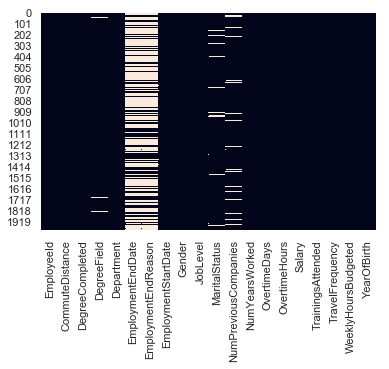

In [9]:

sns.heatmap(employees.isnull(), cbar=False)

# Data Cleaning 

### The steps we are going to take for data cleaning:
- Fill NA values
- Get dummy rows for categorical variables

We are going to take 2 approaches to this problem. Right now, the labels are multi class with classes: `Still With Company`, `Fired`, `Went To Another Company`, and `Retired`. One approach will be to turn this into a binary classification of `Left Company` and `Didn't Leave company`. The other approach will be to leave the problem as a multi class classification problem. We will compare our results at the end.

## Binary Classification Problem

In [10]:
'''
Since we only care about the binary label 'left company' or 'didn't leave company',
we will transform our data accordingly.
'''
endreason = employees[['EmployeeId','EmploymentEndReason']]
endreason = endreason.set_index('EmployeeId')
endreason = endreason.EmploymentEndReason
employees.drop('EmploymentEndReason', axis=1, inplace=True)
endreason = endreason.apply(lambda x: 0 if (str(x) == 'nan') else 1 )



In [11]:
#Deal with categorical fields
is_categorical = employees[['DegreeCompleted','DegreeField','Department','Gender','MaritalStatus','TravelFrequency']]

cat_dummies = pd.get_dummies(is_categorical)

employees = employees.join(cat_dummies)
for col in list(is_categorical.columns):
    employees = employees.drop(col, axis=1)
 
employees.head()

,EmployeeId,CommuteDistance,EmploymentEndDate,EmploymentStartDate,JobLevel,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,...,MaritalStatus_Married,MaritalStatus_Single,TravelFrequency_Less than Monthly,TravelFrequency_Less than monthly,TravelFrequency_Monthly,TravelFrequency_No travel,TravelFrequency_None,TravelFrequency_Weekly,TravelFrequency_monthly,TravelFrequency_weekly
0,1001,10,NaN,12/12/14,4,2.0,13,1,2,96800,...,1,0,0,0,0,0,1,0,0,0
1,1002,7,NaN,10/10/17,2,2.0,12,1,5,60400,...,0,1,0,0,1,0,0,0,0,0
2,1003,9,3/8/19,7/23/14,2,NaN,5,4,15,49100,...,1,0,0,0,0,1,0,0,0,0
3,1004,8,NaN,5/8/14,2,1.0,15,1,3,47100,...,0,1,0,0,0,1,0,0,0,0
4,1005,7,NaN,12/24/13,4,2.0,16,4,12,58700,...,0,1,0,0,1,0,0,0,0,0


In [12]:
# Turn datetime features into numerical features using time-since-epoch

import datetime

'''function to turn a datetime pd.Series into a numerical feature'''
def date_to_feat(series):
    dtseries = series.apply(lambda x : datetime.datetime.strptime(x, '%m/%d/%y'))
    epoch = datetime.datetime.utcfromtimestamp(0)
    featseries = dtseries.apply(lambda x : (x - epoch).total_seconds()/86400)
    return featseries

employees['EmploymentStartTime'] = date_to_feat(employees.EmploymentStartDate)

endtime = employees.EmploymentEndDate
employees = employees.drop('EmploymentStartDate', axis=1)
employees = employees.drop('EmploymentEndDate', axis=1)

employees.NumPreviousCompanies = employees.NumPreviousCompanies.fillna(0)

performance['ReviewTime'] = date_to_feat(performance.ReviewDate)
performance.drop('ReviewDate', axis=1, inplace=True)


In [13]:
employees.head()

,EmployeeId,CommuteDistance,JobLevel,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,WeeklyHoursBudgeted,...,MaritalStatus_Single,TravelFrequency_Less than Monthly,TravelFrequency_Less than monthly,TravelFrequency_Monthly,TravelFrequency_No travel,TravelFrequency_None,TravelFrequency_Weekly,TravelFrequency_monthly,TravelFrequency_weekly,EmploymentStartTime
0,1001,10,4,2.0,13,1,2,96800,0,40,...,0,0,0,0,0,1,0,0,0,16416.0
1,1002,7,2,2.0,12,1,5,60400,1,40,...,1,0,0,1,0,0,0,0,0,17449.0
2,1003,9,2,0.0,5,4,15,49100,2,40,...,0,0,0,0,1,0,0,0,0,16274.0
3,1004,8,2,1.0,15,1,3,47100,0,40,...,1,0,0,0,1,0,0,0,0,16198.0
4,1005,7,4,2.0,16,4,12,58700,1,40,...,1,0,0,1,0,0,0,0,0,16063.0


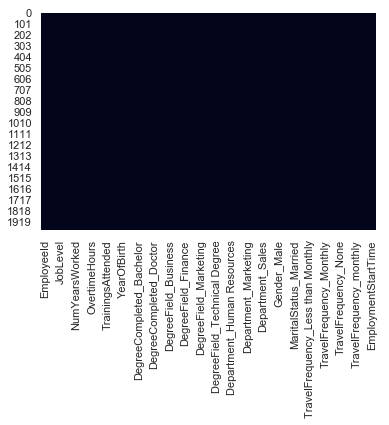

In [14]:
#Checking to make sure we've taken care of all NaN's
sns.heatmap(employees.isnull(), cbar=False)

In [15]:
# Cleaning the survey data before we join tables
surveys.Response = surveys.Response.apply(lambda x: 0 if (x == 'Very Unsatisfied' or x =='Very Poor')\
                              else (1 if (x == 'Somewhat Unsatisfied' or x == 'Poor')\
                              else (2 if (x == 'Neither Satisfied nor Unsatisfied' or x == 'Fair')\
                              else (3 if (x == 'Somewhat Satisfied' or x == 'Good')\
                              else (4 if (x == 'Very Satisfied' or x =='Excellent') else 5)))))
Q1 = surveys[surveys.QuestionNum == 'Q1']
Q2 = surveys[surveys.QuestionNum == 'Q2']
Q3 = surveys[surveys.QuestionNum == 'Q3']
Q4 = surveys[surveys.QuestionNum == 'Q4']

Q1.rename(columns={"Response":"ResponseQ1"}, inplace = True)
Q2.rename(columns={"Response":"ResponseQ2"}, inplace = True)
Q3.rename(columns={"Response":"ResponseQ3"}, inplace = True)
Q4.rename(columns={"Response":"ResponseQ4"}, inplace = True)



/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [16]:
Q1 = Q1.set_index(employees.EmployeeId).drop('EmployeeId',axis=1)
Q2 = Q2.set_index(employees.EmployeeId).drop('EmployeeId',axis=1)
Q3 = Q3.set_index(employees.EmployeeId).drop('EmployeeId',axis=1)
Q4 = Q4.set_index(employees.EmployeeId).drop('EmployeeId',axis=1)

In [17]:
largetable = pd.concat([Q1,Q2,Q3,Q4], sort=False)
responses = largetable.groupby('EmployeeId').sum()
responses.head()

,ResponseQ1,ResponseQ2,ResponseQ3,ResponseQ4
EmployeeId,,,,
1001,4.0,2.0,3.0,4.0
1002,4.0,3.0,4.0,4.0
1003,2.0,3.0,3.0,3.0
1004,2.0,2.0,2.0,1.0
1005,4.0,2.0,3.0,2.0


In [18]:
employees = employees.set_index('EmployeeId')
emp = employees.join(responses)
emp = emp.join(performance.iloc[:,1:])
emp.head()

,CommuteDistance,JobLevel,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,WeeklyHoursBudgeted,YearOfBirth,...,TravelFrequency_Weekly,TravelFrequency_monthly,TravelFrequency_weekly,EmploymentStartTime,ResponseQ1,ResponseQ2,ResponseQ3,ResponseQ4,PerformanceRating,ReviewTime
EmployeeId,,,,,,,,,,,,,,,,,,,,,
1001,10,4,2.0,13,1,2,96800,0,40,1980,...,0,0,0,16416.0,4.0,2.0,3.0,4.0,5,17996.0
1002,7,2,2.0,12,1,5,60400,1,40,1986,...,0,0,0,17449.0,4.0,3.0,4.0,4.0,4,16850.0
1003,9,2,0.0,5,4,15,49100,2,40,1992,...,0,0,0,16274.0,2.0,3.0,3.0,3.0,4,17217.0
1004,8,2,1.0,15,1,3,47100,0,40,1979,...,0,0,0,16198.0,2.0,2.0,2.0,1.0,4,17582.0
1005,7,4,2.0,16,4,12,58700,1,40,1979,...,0,0,0,16063.0,4.0,2.0,3.0,2.0,3,17947.0


# Exploratory Data Analysis

In this section, we will take steps to visualize certain features and analyze their impact for prediction. We will imploy certain feature selection models as a last step before moving into model selection.

Mean Salary: $ 67542.93


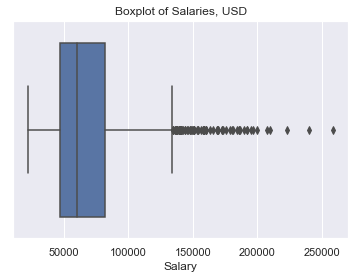

In [19]:
sns.boxplot(x=emp['Salary']).set_title('Boxplot of Salaries, USD')
print('Mean Salary: $', round(emp.Salary.mean(), 2))

In [20]:
empwlabels = emp.join(endreason)
empwlabels.head()

,CommuteDistance,JobLevel,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,WeeklyHoursBudgeted,YearOfBirth,...,TravelFrequency_monthly,TravelFrequency_weekly,EmploymentStartTime,ResponseQ1,ResponseQ2,ResponseQ3,ResponseQ4,PerformanceRating,ReviewTime,EmploymentEndReason
EmployeeId,,,,,,,,,,,,,,,,,,,,,
1001,10,4,2.0,13,1,2,96800,0,40,1980,...,0,0,16416.0,4.0,2.0,3.0,4.0,5,17996.0,0
1002,7,2,2.0,12,1,5,60400,1,40,1986,...,0,0,17449.0,4.0,3.0,4.0,4.0,4,16850.0,0
1003,9,2,0.0,5,4,15,49100,2,40,1992,...,0,0,16274.0,2.0,3.0,3.0,3.0,4,17217.0,1
1004,8,2,1.0,15,1,3,47100,0,40,1979,...,0,0,16198.0,2.0,2.0,2.0,1.0,4,17582.0,0
1005,7,4,2.0,16,4,12,58700,1,40,1979,...,0,0,16063.0,4.0,2.0,3.0,2.0,3,17947.0,0


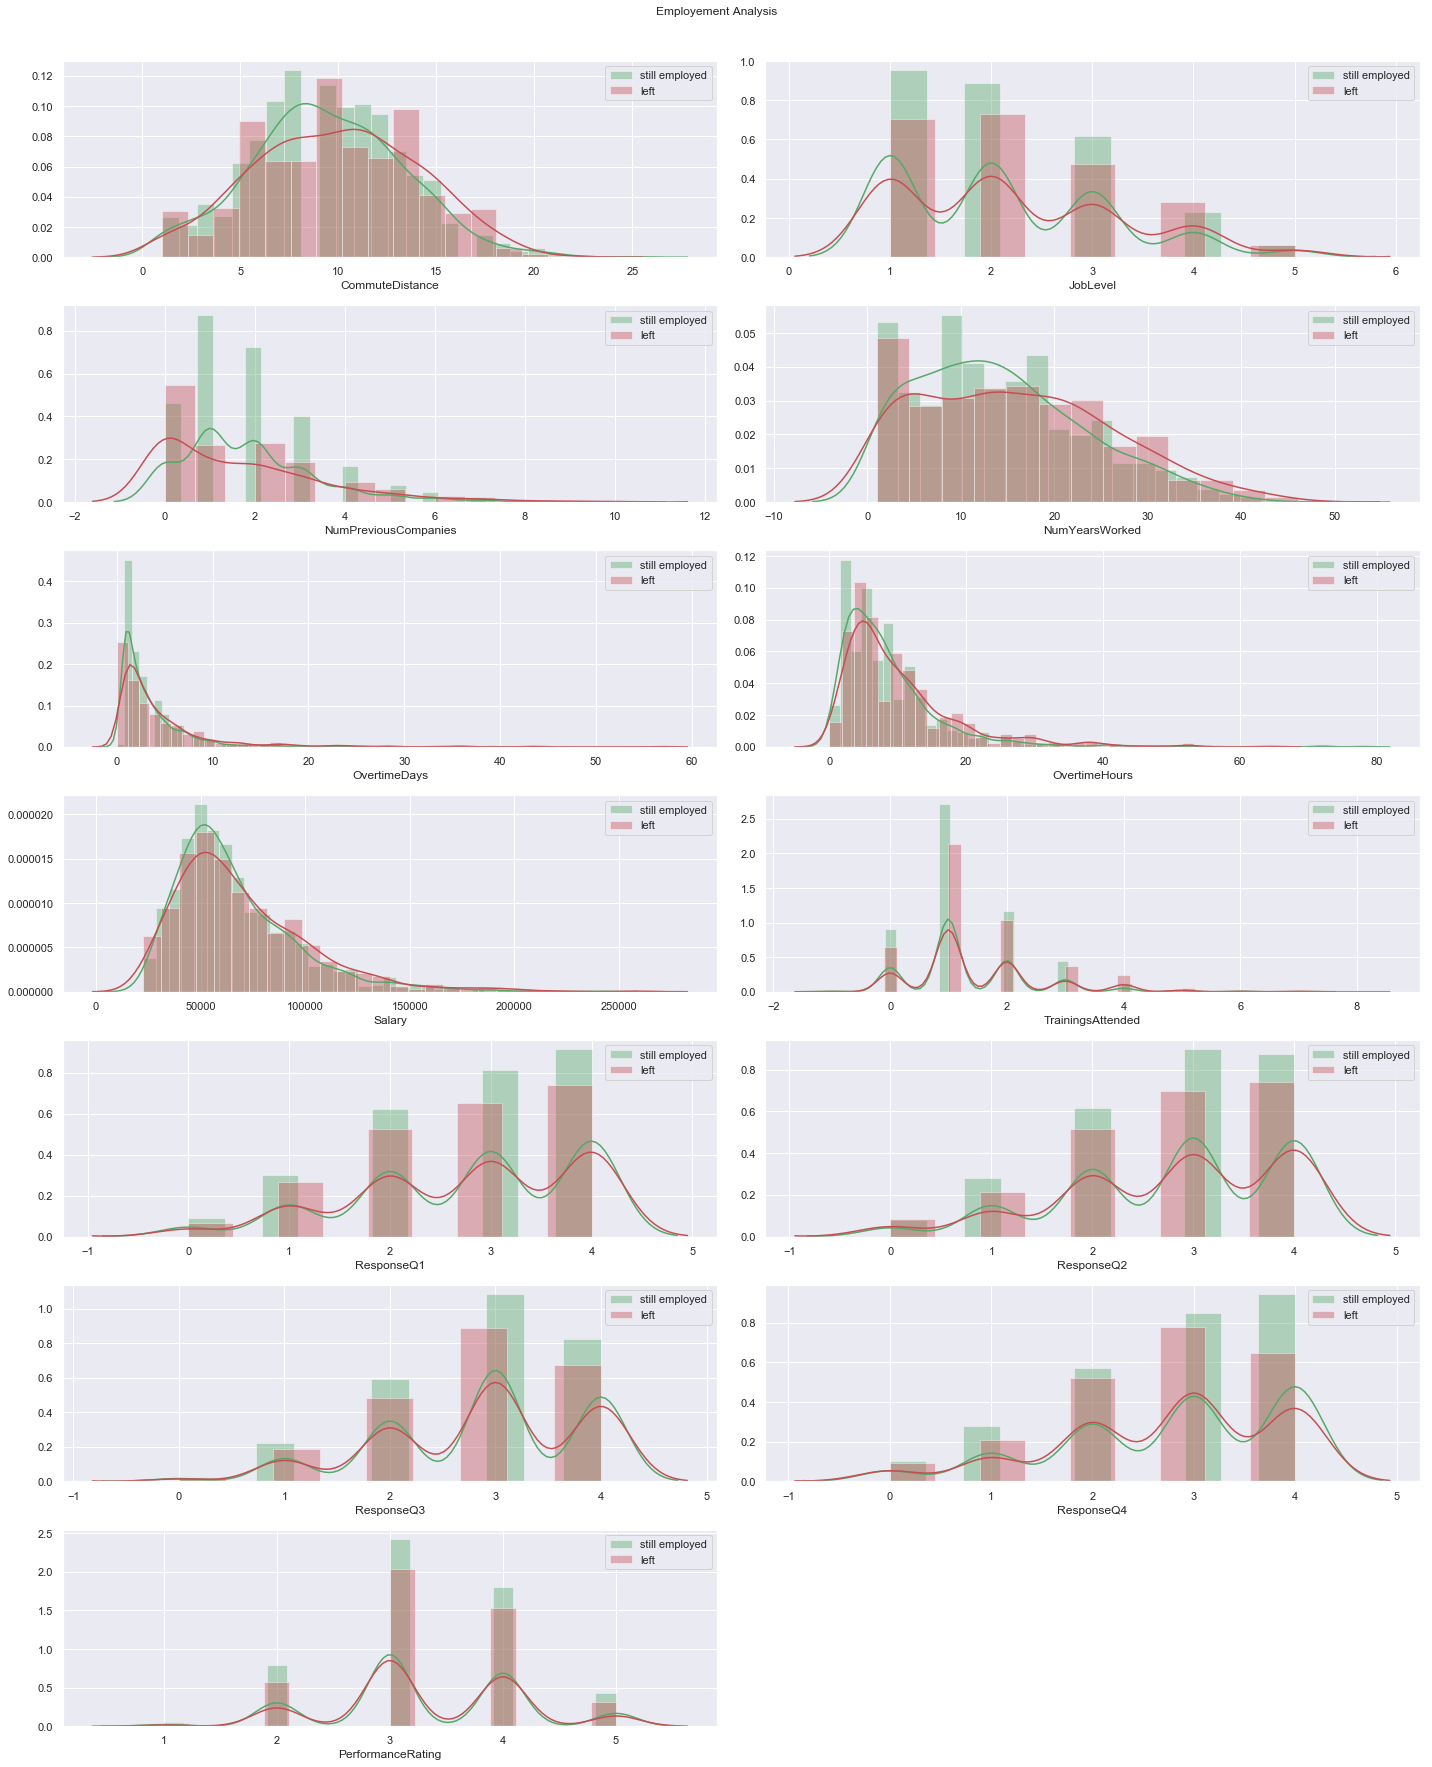

In [21]:
relavent_columns = ['CommuteDistance', 'JobLevel', 'NumPreviousCompanies', 'NumYearsWorked',
       'OvertimeDays', 'OvertimeHours', 'Salary', 'TrainingsAttended','ResponseQ1',
       'ResponseQ2', 'ResponseQ3', 'ResponseQ4', 'PerformanceRating']
fig = plt.figure(figsize = (20, 25))
j = 0
for i in relavent_columns:
    plt.subplot(7, 2, j+1)
    j += 1
    sns.distplot(empwlabels[i][endreason==0], color='g', label = 'still employed')
    sns.distplot(empwlabels[i][endreason==1], color='r', label = 'left')
    plt.legend(loc='best')
fig.suptitle('Employement Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

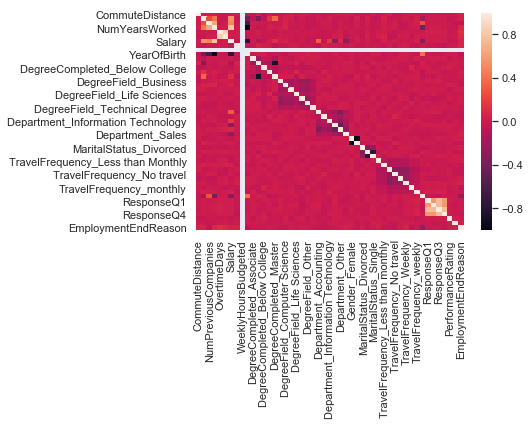

In [22]:
corr = empwlabels.corr()
sns.heatmap(corr)

In [23]:
''' 
Variance Inflation factor function will calculate and remove
variables with high multicollinearity from our model.

One recommendation from the documentation is that if VIF is greater 
than 5, then the explanatory variable given by exog_idx 
is highly collinear with the other explanatory variables, 
and the parameter estimates will have large standard errors
because of this. Thus, we remove all such variables
'''

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


In [24]:
emp_vif = calculate_vif_(emp)

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'DegreeCompleted_Associate' at index: 10
dropping 'DegreeCompleted_Below College' at index: 11
dropping 'Department_Accounting' at index: 20
dropping 'Gender_Female' at index: 25
dropping 'TravelFrequency_Less than Monthly' at index: 29
dropping 'WeeklyHoursBudgeted' at index: 8
dropping 'YearOfBirth' at index: 8
dropping 'EmploymentStartTime' at index: 34
dropping 'Salary' at index: 6
dropping 'ReviewTime' at index: 38
dropping 'ResponseQ3' at index: 35
dropping 'DegreeField_Other' at index: 15
dropping 'PerformanceRating' at index: 35
dropping 'ResponseQ2' at index: 33
dropping 'MaritalStatus_Married' at index: 23
dropping 'ResponseQ4' at index: 32
dropping 'DegreeCompleted_Bachelor' at index: 7
dropping 'OvertimeHours' at index: 5
dropping 'JobLevel' at index: 1
dropping 'ResponseQ1' at index: 28
dropping 'CommuteDistance' at index: 0
dropping 'NumYearsWorked' at index: 1
Remaining variables:
Index(['NumPreviousCompanies', 'OvertimeDays', 'TrainingsAttended',
       'Degree

In [25]:
# Remove remaining columns with high correlation
colsbefore = set(empwlabels.columns)
print('# of Columns before removal: ', len(list(empwlabels.columns)))
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = empwlabels.columns[columns]
empwlabels = empwlabels[selected_columns]
colsafter = set(empwlabels.columns)

print('# of Columns after removal: ', len(list(empwlabels.columns)))
print('Columns Removed: ', colsbefore - colsafter)


# of Columns before removal:  49
# of Columns after removal:  48
Columns Removed:  {'OvertimeHours'}


In [26]:
features = empwlabels.iloc[:,:-1]
labels = empwlabels.iloc[:,-1]

# Model Selection and Parameter Tuning

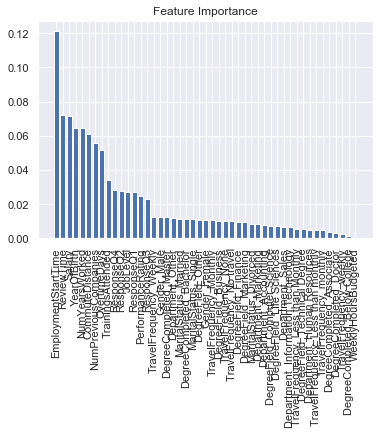

In [27]:

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#train test split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=0)


# Train A Decision Tree Model

# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(x_train, y_train)

# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

rf_predictions = clf.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 70.32%


Confusion matrix, without normalization
[[236  21]
 [ 98  46]]


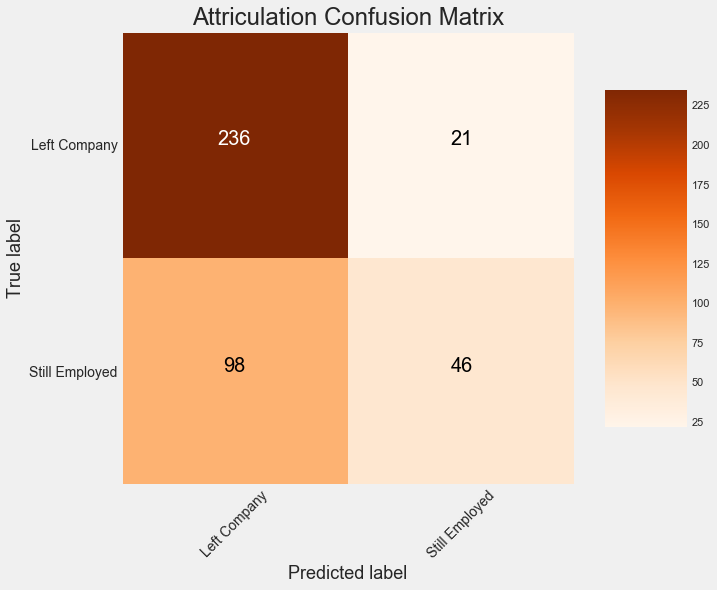

In [29]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18


from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Left Company', 'Still Employed'],
                      title = 'Attriculation Confusion Matrix')



In [30]:
#Let's see if XGBoost can help us improve our accuracy

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Accuracy: 67.33%


In [35]:
# Lastly, let's employ GridSearchCV on our decision tree to boost performance

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,40,50, 60],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
print(best_grid)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [36]:
predictions = best_grid.predict(x_test)
 
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.08%


# Binary Classification Results

The best model was model #1: A simple RFC model with minimal hyperparameter tuning, with an accuracy of 70.32%

# Multiclass Classification

We will skip most of the steps taken previously and jump strait to our model selection.

In [34]:
#Reload the employees DF to get multiclass end reason
employees = pd.read_csv('data/Employees.csv')
multiEndReason = employees['EmploymentEndReason']
multiEndReason.head()
multiEndReason = multiEndReason.fillna('Still Employed')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Fired', 'Retired', 'Still Employed', 'Went to another company'])
labels = le.transform(multiEndReason)
labels

In [ ]:
#new train test split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=0)


# Train A Decision Tree Model

# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(x_train, y_train)

# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
rf_predictions = clf.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
#Let's see if XGBoost can help us improve our accuracy

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# Lastly, let's employ GridSearchCV on our decision tree to boost performance

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60,70,80, 90],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [ 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
print(best_grid)


In [ ]:
predictions = best_grid.predict(x_test)
 
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Results

Binary classification yielded better results by roughly 2% accuracy increase, but ultimately it depends on what the business question being asked is to determine which way of labeling best suites the problem.

In general, 71% accuracy is not great for a model. If we take a look at the feature importance chart, we see that no feature has more than a .14 correlation with the dependent variable, thus it is a bit tricky to fit this dataset.

I tried doing more advanced feature reduction with no added benefit. In general, having 40 plus features on 2000 rows of data is a bit overkill. Perhaps if one spent more time on feature manipulation, better results could be gotten.